### '직업','환자통증정도','통증기간(월)','당뇨여부','심혈관질환','암발병여부','체중','연령','신장','전방디스크높이(mm)','후방디스크높이(mm)','디스크단면적','디스크위치','PI','수술기법' 컬럼에 따른 입원 기간의 차이를 분석하여 어떤 컬럼이 입원기간에 영향을 주는지에 대해 알아볼것이다.
#### <분석을 맡은 컬럼>
- 가베 : '체중','연령','신장','전방디스크높이(mm)','후방디스크높이(mm)','디스크단면적','디스크위치','PI','수술기법'
- 하늘 : '직업', '당뇨여부','심혈관질환','암발병여부','환자통증정도','통증기간(월)'

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_ROS = pd.read_csv('../../../dataset/RecurrenceOfSurgeryData.csv')
df_ROS.head(2)

,Unnamed: 0,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI,수술기법
0,0,2,자영업,10,1.0,0,0,0,60.3,66,163,16.1,12.3,2048.5,4,51.6,TELD
1,1,1,운동선수,10,1.0,0,0,0,71.7,47,171,13.7,6.4,1753.1,4,40.8,TELD


In [4]:
df_ROS.columns

Index(['Unnamed: 0', '입원기간', '직업', '환자통증정도', '통증기간(월)', '당뇨여부', '심혈관질환',
       '암발병여부', '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적',
       '디스크위치', 'PI', '수술기법'],
      dtype='object')

### 분석 맡은 컬럼 추출

In [5]:
df_ROS_SKY = df_ROS[['입원기간','직업','환자통증정도','통증기간(월)','당뇨여부','심혈관질환','암발병여부']]
df_ROS_SKY[:2]

,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부
0,2,자영업,10,1.0,0,0,0
1,1,운동선수,10,1.0,0,0,0


In [6]:
df_ROS_SKY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   입원기간     1405 non-null   int64  
 1   직업       1405 non-null   object 
 2   환자통증정도   1405 non-null   int64  
 3   통증기간(월)  1405 non-null   float64
 4   당뇨여부     1405 non-null   int64  
 5   심혈관질환    1405 non-null   int64  
 6   암발병여부    1405 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 77.0+ KB


In [8]:
df_ROS_SKY.describe()

,입원기간,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.00000
mean,1.720285,6.921708,6.372811,0.053381,0.037011,0.01210
std,2.218973,2.036593,18.651710,0.224872,0.188855,0.10937
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,7.000000,1.000000,0.000000,0.000000,0.00000
50%,1.000000,7.000000,2.000000,0.000000,0.000000,0.00000
75%,2.000000,8.000000,5.000000,0.000000,0.000000,0.00000
max,46.000000,10.000000,360.000000,1.000000,1.000000,1.00000


In [9]:
df_ROS_SKY.describe(include=object)

,직업
count,1405
unique,17
top,사무직
freq,424


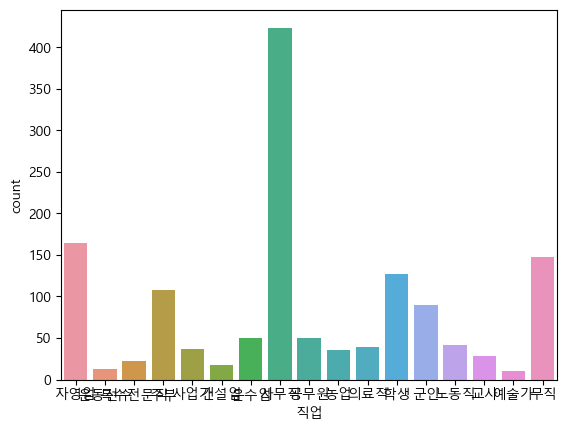

In [17]:
sns.countplot(data=df_ROS_SKY, x='직업')
plt.show()

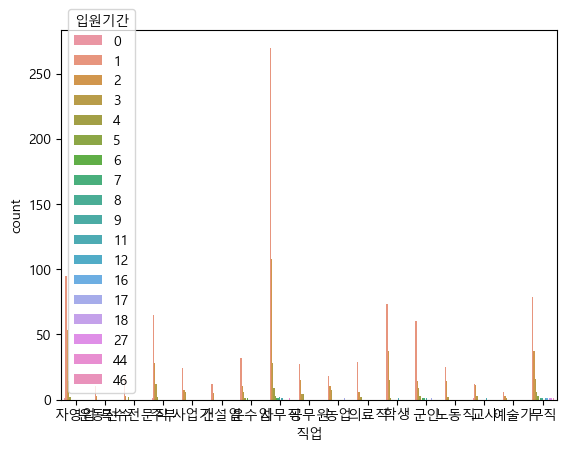

In [18]:
sns.countplot(data=df_ROS_SKY, x='직업' , hue='입원기간')
plt.show()

In [11]:
df_ROS_SKY[['통증기간(월)']].value_counts()

통증기간(월)
1.00       550
2.00       249
3.00       140
12.00       81
6.00        74
4.00        44
5.00        43
24.00       32
10.00       23
7.00        20
1.50        18
9.00        17
8.00        17
36.00       14
60.00        8
120.00       7
18.00        7
48.00        7
0.50         6
0.25         6
0.20         4
96.00        4
14.00        4
30.00        2
22.00        2
21.00        2
13.00        2
15.00        2
84.00        2
0.30         2
0.75         2
240.00       2
46.00        1
180.00       1
0.00         1
11.00        1
17.00        1
16.00        1
0.10         1
4.50         1
3.50         1
2.50         1
0.80         1
360.00       1
dtype: int64

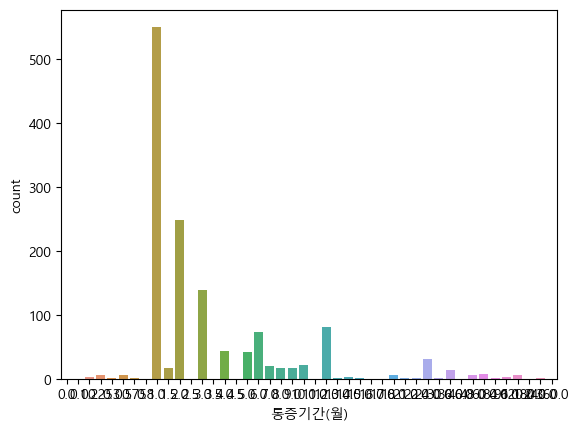

In [15]:
sns.countplot(data=df_ROS_SKY, x='통증기간(월)')
plt.show()

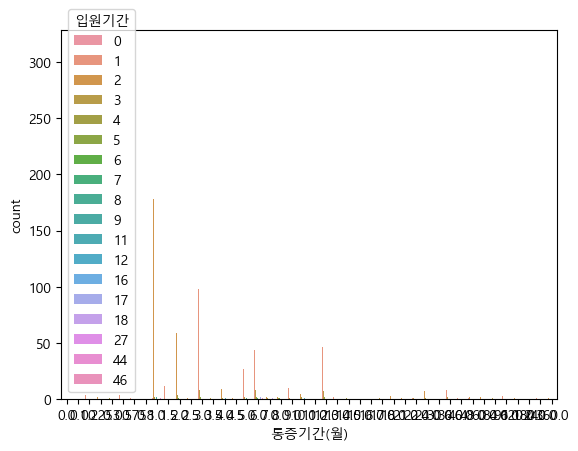

In [16]:
sns.countplot(data=df_ROS_SKY, x='통증기간(월)' , hue='입원기간')
plt.show()

### 연속형 컬럼 중 범주형으로 변경 할 컬럼 확인 및 변경

In [19]:
df_ROS_SKY[['당뇨여부']].value_counts()

당뇨여부
0       1330
1         75
dtype: int64

In [20]:
df_ROS_SKY[['심혈관질환']].value_counts()

심혈관질환
0        1353
1          52
dtype: int64

In [21]:
df_ROS_SKY[['암발병여부']].value_counts()

암발병여부
0        1388
1          17
dtype: int64

In [23]:
df_ROS_SKY[['환자통증정도']].value_counts()

환자통증정도
7         667
8         311
9         126
2          89
10         77
1          41
6          33
5          31
3          28
4           2
dtype: int64

In [31]:
df_ROS_SKY[['당뇨여부','심혈관질환','암발병여부']] = df_ROS_SKY[['당뇨여부','심혈관질환','암발병여부']].astype(str)

C:\Users\01-09\AppData\Local\Temp\ipykernel_6796\139356218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_SKY[['당뇨여부','심혈관질환','암발병여부']] = df_ROS_SKY[['당뇨여부','심혈관질환','암발병여부']].astype(str)


In [32]:
df_ROS_SKY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   입원기간     1405 non-null   int64  
 1   직업       1405 non-null   object 
 2   환자통증정도   1405 non-null   int64  
 3   통증기간(월)  1405 non-null   float64
 4   당뇨여부     1405 non-null   object 
 5   심혈관질환    1405 non-null   object 
 6   암발병여부    1405 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 77.0+ KB
